In [1]:
import pandas as pd 
import matplotlib as plt
import numpy as np 
from operator import itemgetter

In [2]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df_n = df.copy()

In [4]:
df_n = df_n.dropna()
cols = list(df_n.columns)
df_na = {col: list(pd.isna(df_n[col])).count(True) for col in cols}
df_na

{'Rank': 0,
 'Name': 0,
 'Platform': 0,
 'Year': 0,
 'Genre': 0,
 'Publisher': 0,
 'NA_Sales': 0,
 'EU_Sales': 0,
 'JP_Sales': 0,
 'Other_Sales': 0,
 'Global_Sales': 0}

In [5]:
from operator import itemgetter

In [6]:
platf_data = [(name, df_n["Platform"].to_list().count(name)) 
                  for name in df_n["Platform"].unique() ]
platf_data = sorted(platf_data, key=itemgetter(1))
pl_data = platf_data[:-8:-1]
pl_data

[('DS', 2131),
 ('PS2', 2127),
 ('PS3', 1304),
 ('Wii', 1290),
 ('X360', 1234),
 ('PSP', 1197),
 ('PS', 1189)]

<AxesSubplot:xlabel='platforms'>

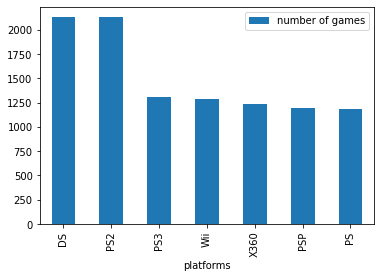

In [7]:
cases = []
platforms = []
for i in range(len(pl_data)):
    platforms.append(pl_data[i][0])
    cases.append(pl_data[i][1])

platform_info = pd.DataFrame({"platforms": platforms, "number of games": cases})
platform_info.plot.bar(x="platforms", y="number of games")

In [8]:
import numpy as np

Text(0, 0.5, 'Sales')

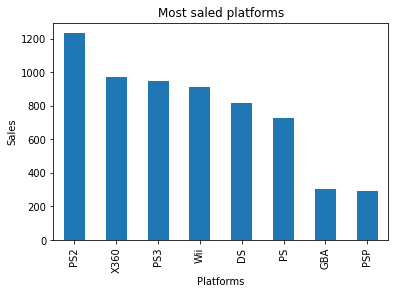

In [9]:
pl_sales = df_n.groupby(["Platform"])["Global_Sales"].agg(np.sum)

fig = pl_sales.sort_values(ascending=False)[:8].plot.bar()
fig.set_title("Most saled platforms")
fig.set_xlabel("Platforms")
fig.set_ylabel("Sales")

<ipython-input-10-abe0ebae5204>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  platform_sales_all = df_n.groupby(["Platform"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)


Text(0, 0.5, 'Sales')

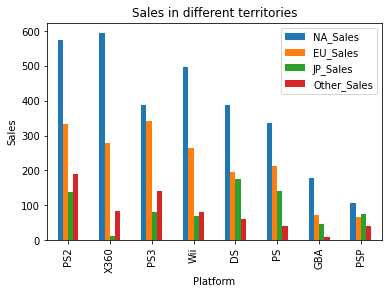

In [10]:
platform_sales_all = df_n.groupby(["Platform"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)
platform_sales_all = platform_sales_all.sort_values("Global_Sales", ascending=False)[:8]
del platform_sales_all["Global_Sales"]

fig = platform_sales_all.plot.bar()
fig.set_title("Sales in different territories")
fig.set_xlabel("Platform")
fig.set_ylabel("Sales")

Text(0.5, 0, 'Year')

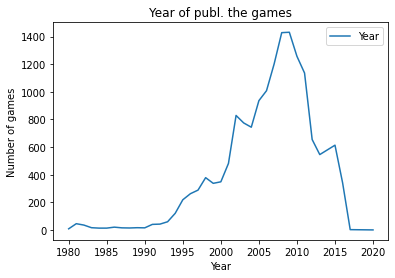

In [11]:
year_data = {year: df_n["Year"].to_list().count(year) for year in set(df_n["Year"])}
year_df = pd.DataFrame.from_dict(data=year_data, orient="index", columns=["Year"])

fig = year_df.plot()
fig.set_title("Year of publ. the games")
fig.set_ylabel("Number of games")
fig.set_xlabel("Year")

Text(0, 0.5, 'Sales')

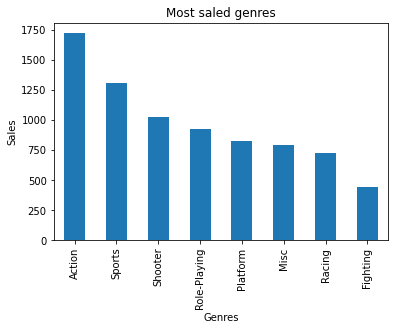

In [12]:
genre_sales = df_n.groupby(["Genre"])["Global_Sales"].agg(np.sum)

fig = genre_sales.sort_values(ascending=False)[:8].plot.bar()
fig.set_title("Most saled genres")
fig.set_xlabel("Genres")
fig.set_ylabel("Sales")

<ipython-input-13-29899c8500a5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_sales_all = df_n.groupby(["Genre"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)


Text(0, 0.5, 'Sales')

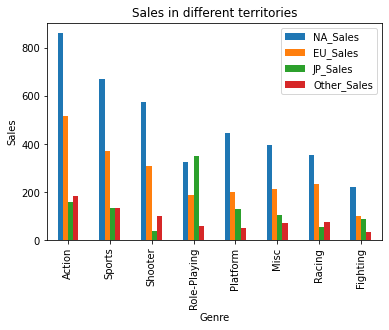

In [13]:
genre_sales_all = df_n.groupby(["Genre"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)
genre_sales_all = genre_sales_all.sort_values("Global_Sales", ascending=False)[:8]
del genre_sales_all["Global_Sales"]

fig = genre_sales_all.plot.bar()
fig.set_title("Sales in different territories")
fig.set_xlabel("Genre")
fig.set_ylabel("Sales")

Text(0, 0.5, 'Sales')

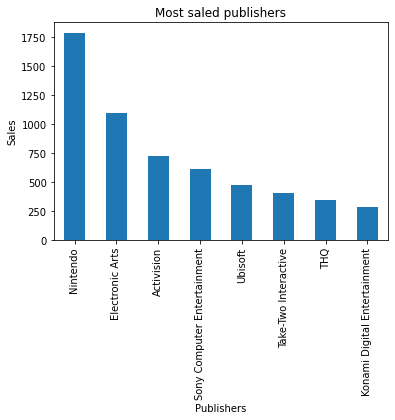

In [14]:
publisher_sales = df_n.groupby(["Publisher"])["Global_Sales"].agg(np.sum)

fig = publisher_sales.sort_values(ascending=False)[:8].plot.bar()
fig.set_title("Most saled publishers")
fig.set_xlabel("Publishers")
fig.set_ylabel("Sales")

<ipython-input-15-2ae99f5a1dab>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  publisher_sales_all = df_n.groupby(["Publisher"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)


Text(0, 0.5, 'Sales')

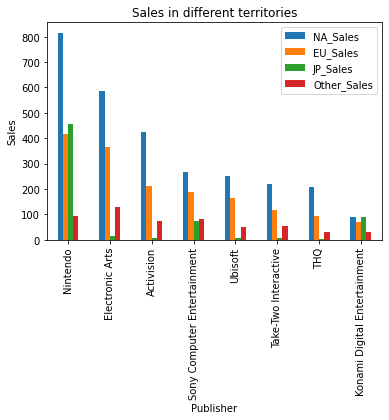

In [15]:
publisher_sales_all = df_n.groupby(["Publisher"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)
publisher_sales_all = publisher_sales_all.sort_values("Global_Sales", ascending=False)[:8]
del publisher_sales_all["Global_Sales"]

fig = publisher_sales_all.plot.bar()
fig.set_title("Sales in different territories")
fig.set_xlabel("Publisher")
fig.set_ylabel("Sales")

In [17]:
df_n.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [30]:
df_n["Global_Sales"][df_n.Global_Sales < 1].count()

14233